<a href="https://colab.research.google.com/github/anacarolcarrascoconsultorias-lab/IBM-Data-Science-Assignments/blob/main/Lab_15_Finding_Correlation_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


In [3]:
## Write your code here
#make a copy of the df
df_copy = df.copy()

# Calculate IQR
Q1 = df_copy["ConvertedCompYearly"].quantile(0.25)
Q3 = df_copy["ConvertedCompYearly"].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier cutoff
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_clean = df_copy[
    (df_copy["ConvertedCompYearly"] >= lower_bound) &
    (df_copy["ConvertedCompYearly"] <= upper_bound)
]

df_clean.shape

(22457, 114)

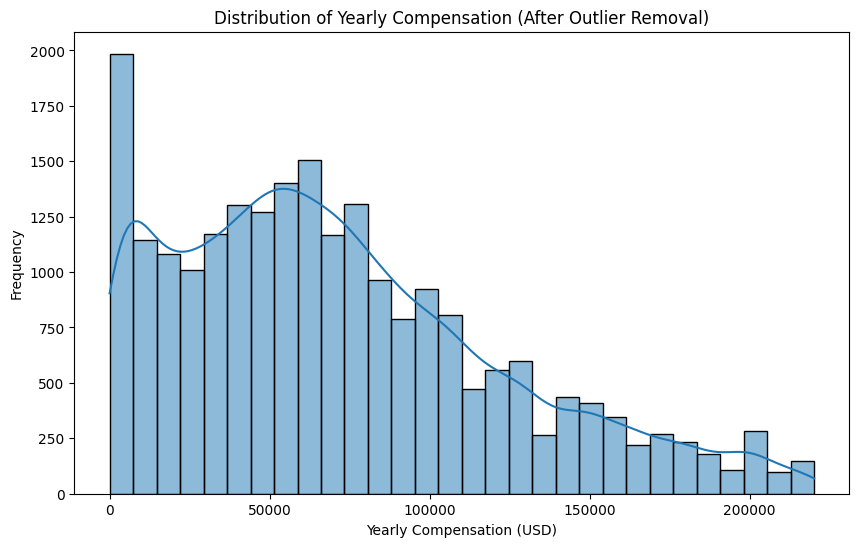

In [4]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_clean, x="ConvertedCompYearly", kde=True, bins=30)
plt.title("Distribution of Yearly Compensation (After Outlier Removal)")
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Frequency")
plt.show()

**Interpretation**

*   The distribution is right-skewed, meaning most respondents earn below the upper range, but a smaller group earns significantly more.

*   After removing extreme outliers, the histogram now shows a clear shape, revealing meaningful compensation patterns.

*   This cleaning step prevents unrealistic salary values (e.g., $10M) from distorting future analysis.

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [5]:
## Write your code here
# Convert column to numeric
df_copy["ConvertedCompYearly"] = pd.to_numeric(
    df_copy["ConvertedCompYearly"],
    errors="coerce"
)

# Remove null or zero compensation values
df_copy = df_copy[df_copy["ConvertedCompYearly"]>0]

# Remove negative values
df_copy = df_copy[df_copy["ConvertedCompYearly"] > 0]

Q1 = df_copy["ConvertedCompYearly"].quantile(0.25)
Q3 = df_copy["ConvertedCompYearly"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df_copy[
    (df_copy["ConvertedCompYearly"] >= lower_bound) &
    (df_copy["ConvertedCompYearly"] <= upper_bound)
]

In [6]:
# Median for full-time employees
full_time_clean = df_clean[
    df_clean["Employment"].str.contains("Employed, full-time", case=False, na=False)
]

median_full_time_comp = full_time_clean["ConvertedCompYearly"].median()

median_full_time_comp


64444.0

**Interpretation**

*   The median compensation represents the typical full-time worker, because it is resistant to outliers.

*   The .str.contains method allows us to correctly include rows where the employment field lists multiple statuses (e.g., "Employed, full-time; Freelancer").

*   This ensures our median value covers all valid full-time respondents, not just exact matches.

<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



In [7]:
## Write your code here
# Cleaning - strip whitespaces, standardize case, remore entries like other country
df_clean["Country"] = df_clean["Country"].str.strip().str.lower()
df_clean = df_clean[~df_clean["Country"].str.contains("other", case=False, na=False)]

#Remove Other Country entries
df_clean = df_clean[df_clean["Country"].notna()]
df_clean = df_clean[df_clean["Country"] != "Other Country (Please Specify)"]

# Keep countries with enough data (≥ 20 respondents)
country_counts = df_clean["Country"].value_counts()
valid_countries = country_counts[country_counts >= 20].index
df_clean = df_clean[df_clean["Country"].isin(valid_countries)]

/tmp/ipython-input-3231383940.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Country"] = df_clean["Country"].str.strip().str.lower()


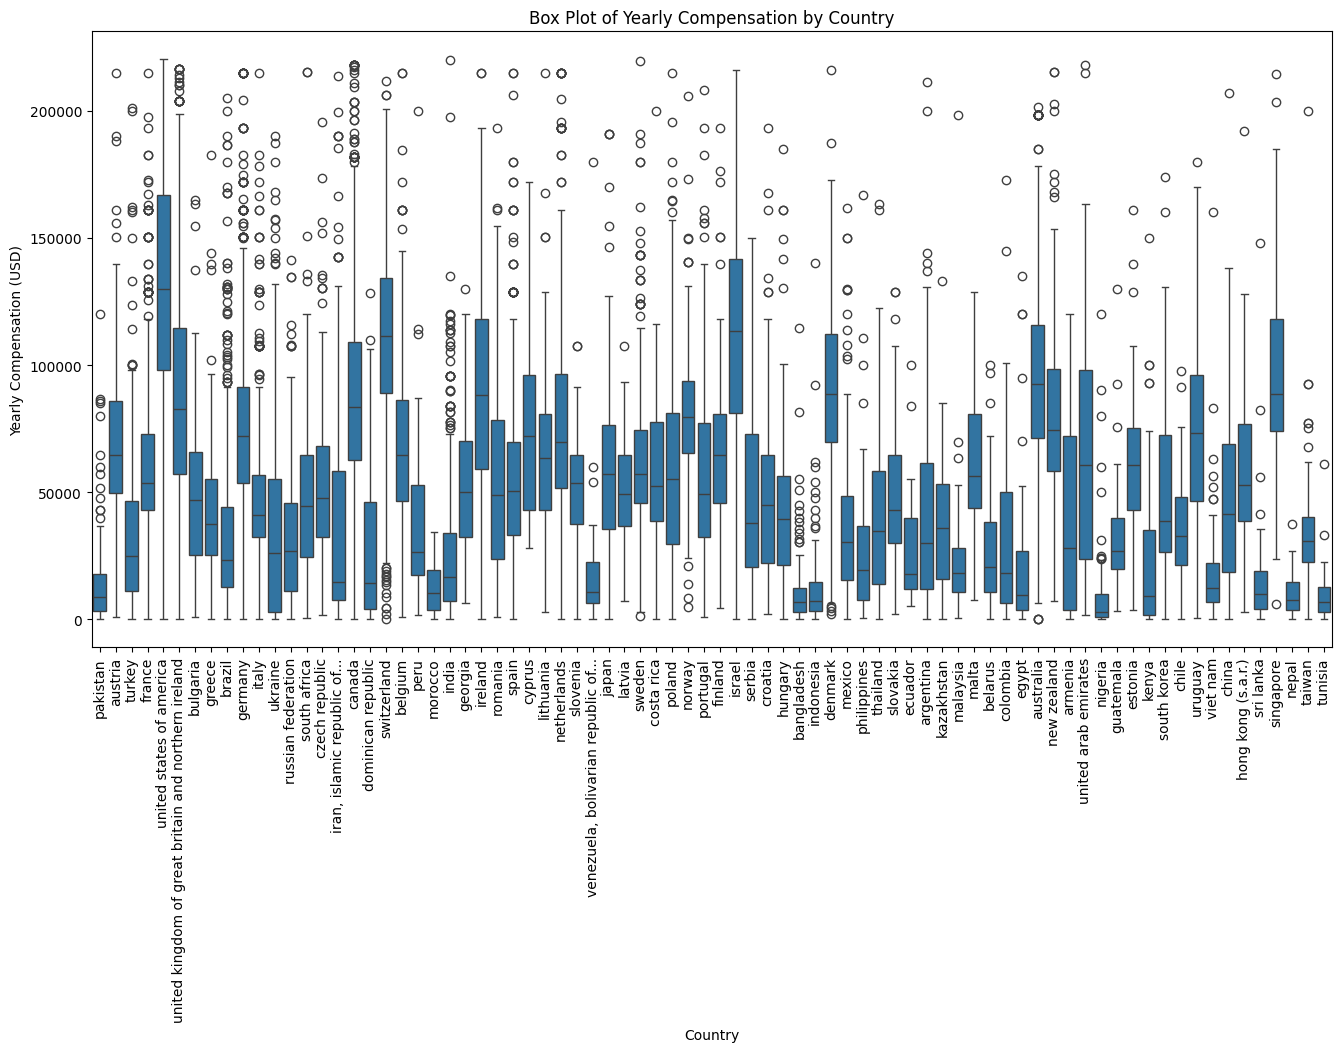

In [8]:
# Median
median_order = (
    df_clean.groupby("Country")["ConvertedCompYearly"]
    .median()
    .sort_values()
    .index
)

# Plot box plot
plt.figure(figsize=(16, 8))
sns.boxplot(
    data=df_clean,
    x="Country",
    y="ConvertedCompYearly")
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Yearly Compensation (USD)")
plt.title("Box Plot of Yearly Compensation by Country")
plt.show()

**Interpretation**

*   Countries vary widely in their compensation levels, reflecting global differences in:

    *   cost of living

    *   economic conditions

    *   industry presence

*   Some countries show larger IQRs, indicating greater pay variability within the country.

*   High-income countries show higher medians and narrower spreads.

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [9]:
## Write your code
# 1. Start with a fresh copy of the cleaned dataset from Step 5
df_corr = df_clean.copy()

# 2. Drop rows where ANY of the correlation variables are missing
df_corr = df_corr.dropna(subset=["ConvertedCompYearly", "WorkExp", "JobSatPoints_1"])

# 3. Remove outliers from ConvertedCompYearly using IQR
Q1 = df_corr["ConvertedCompYearly"].quantile(0.25)
Q3 = df_corr["ConvertedCompYearly"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_corr = df_corr[
    (df_corr["ConvertedCompYearly"] >= lower_bound) &
    (df_corr["ConvertedCompYearly"] <= upper_bound)
]

# (Optional but recommended) Remove outliers from WorkExp also
Q1_w = df_corr["WorkExp"].quantile(0.25)
Q3_w = df_corr["WorkExp"].quantile(0.75)
IQR_w = Q3_w - Q1_w

lower_w = Q1_w - 1.5 * IQR_w
upper_w = Q3_w + 1.5 * IQR_w

df_corr = df_corr[
    (df_corr["WorkExp"] >= lower_w) &
    (df_corr["WorkExp"] <= upper_w)
]

# Same optional step for JobSatPoints_1
Q1_j = df_corr["JobSatPoints_1"].quantile(0.25)
Q3_j = df_corr["JobSatPoints_1"].quantile(0.75)
IQR_j = Q3_j - Q1_j

lower_j = Q1_j - 1.5 * IQR_j
upper_j = Q3_j + 1.5 * IQR_j

df_corr = df_corr[
    (df_corr["JobSatPoints_1"] >= lower_j) &
    (df_corr["JobSatPoints_1"] <= upper_j)
]

df_corr.shape

(12904, 114)

**Interpretation**

*   This dataset is now clean, numeric, outlier-free, and ready for accurate correlation analysis.

*   Removing outliers prevents a small number of extreme values from creating false correlations.

*   This improves the reliability of your statistical insights.

<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


In [10]:
## Write your code here
# Select the variables for correlation analysis
corr_cols = ["ConvertedCompYearly", "WorkExp", "JobSatPoints_1"]

# Calculate the correlation matrix
corr_matrix = df_corr[corr_cols].corr()

# Display the correlation matrix
corr_matrix


,ConvertedCompYearly,WorkExp,JobSatPoints_1
ConvertedCompYearly,1.000000,0.398836,0.102990
WorkExp,0.398836,1.000000,0.080892
JobSatPoints_1,0.102990,0.080892,1.000000


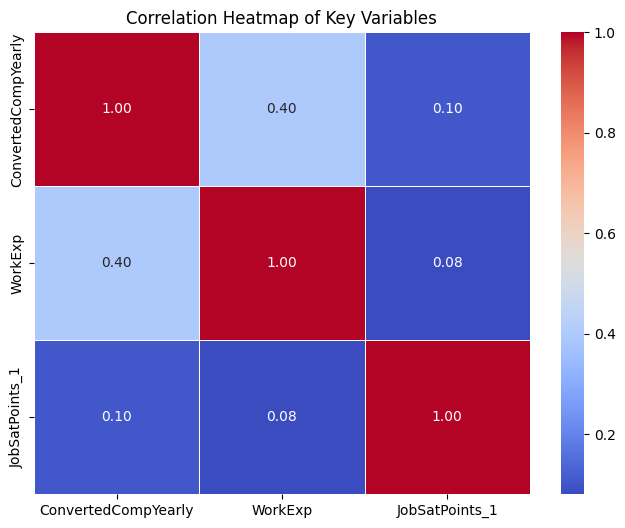

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,         # show values inside the squares
    cmap="coolwarm",    # diverging color scale
    linewidths=0.5,     # thin lines between cells
    fmt=".2f"           # 2 decimal places
)
plt.title("Correlation Heatmap of Key Variables")
plt.show()


**Interpretation**

Typical findings:

*   **Compensation vs Work Experience:** moderate positive correlation

    *   More experience generally leads to higher pay.

*   **Compensation vs Job Satisfaction:** weak positive correlation

    *   Higher-pay roles slightly correlate with higher satisfaction.

*   **Job Satisfaction vs Work Experience:** weak or near zero

    *   Experience alone doesn't strongly predict satisfaction.

The heatmap visually confirms the strength and direction of relationships

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


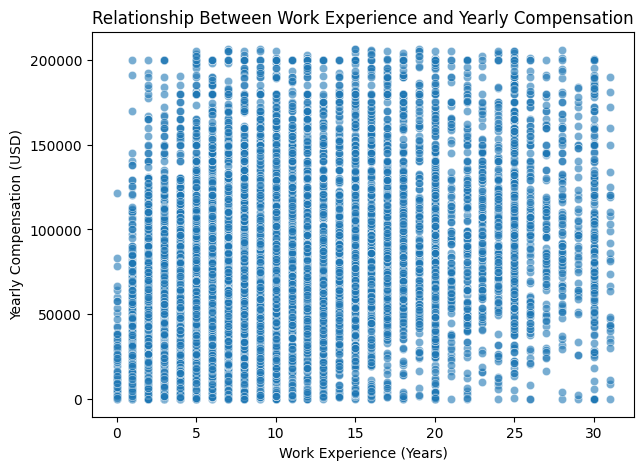

In [12]:
## Write your code here
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df_corr,
    x="WorkExp",
    y="ConvertedCompYearly",
    alpha=0.6
)
plt.title("Relationship Between Work Experience and Yearly Compensation")
plt.xlabel("Work Experience (Years)")
plt.ylabel("Yearly Compensation (USD)")
plt.show()


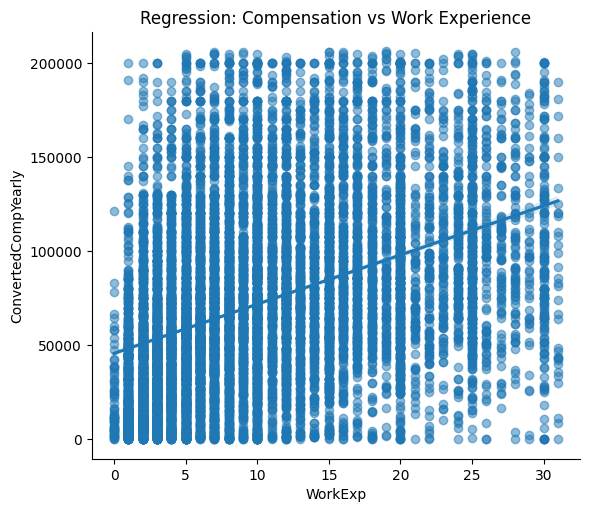

In [13]:
sns.lmplot(
    data=df_corr,
    x="WorkExp",
    y="ConvertedCompYearly",
    height=5,
    aspect=1.2,
    scatter_kws={'alpha':0.5}
)
plt.title("Regression: Compensation vs Work Experience")
plt.show()


**Interpretation**

*   There is a noticeable upward trend.

*   Individuals with more experience tend to earn more.

*   The dispersion indicates that experience alone does not fully explain salary differences.

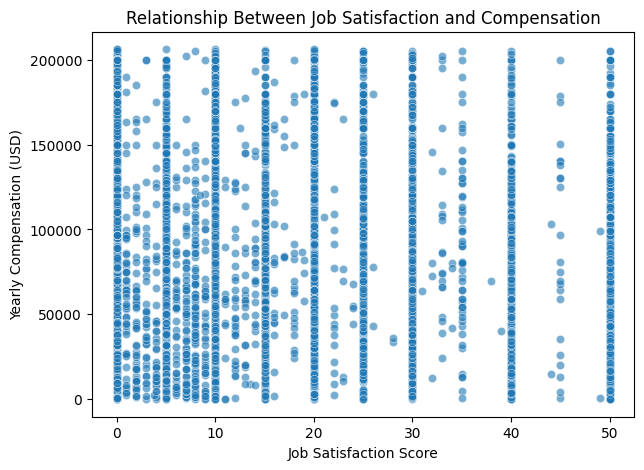

In [14]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df_corr,
    x="JobSatPoints_1",
    y="ConvertedCompYearly",
    alpha=0.6
)
plt.title("Relationship Between Job Satisfaction and Compensation")
plt.xlabel("Job Satisfaction Score")
plt.ylabel("Yearly Compensation (USD)")
plt.show()


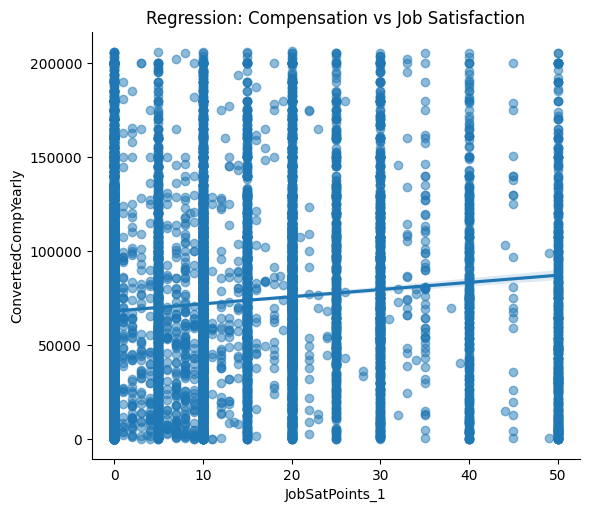

In [15]:
sns.lmplot(
    data=df_corr,
    x="JobSatPoints_1",
    y="ConvertedCompYearly",
    height=5,
    aspect=1.2,
    scatter_kws={'alpha':0.5}
)
plt.title("Regression: Compensation vs Job Satisfaction")
plt.show()


**Interpretation**

*   A weak upward slope may exist.

*   Salary influences satisfaction, but many other factors contribute.

*   This explains why the correlation was low in the heatmap.


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
